Try out MAF on SDSS data

To run this, one needs to be able to connect to fatboy.  See instructions here: https://confluence.lsstcorp.org/display/SIM/Catalog+Simulations+Documentation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

In [2]:
outDir = 'SDSSSlicer'
resultsDb = db.ResultsDb(outDir=outDir)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint filter='r' and nStars > 0 and nGalaxy > 0
Found 723077 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
Plotting complete.
Re-saving metric bundles.


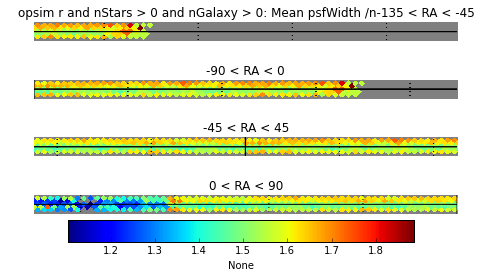

In [4]:
# For connecting when on UW campus
sdssDB = db.SdssDatabase(database='clue', driver='mssql+pymssql', port=1433, host='fatboy-private.phys.washington.edu')
# XXX-note, this is untested: For off campus, need to open an ssh tunnel and use: 
# sdssDB = db.SdssDatabase(database='clue', driver='mssql+pymssql', port=51433, host='localhost')
sqlWhere = "filter='r' and nStars > 0 and nGalaxy > 0"
slicer = slicers.HealpixSDSSSlicer(nside=64, lonCol='RA1', latCol='Dec1')
metric = metrics.MeanMetric(col='psfWidth')
bundle = metricBundles.MetricBundle(metric, slicer, sqlWhere)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, sdssDB, outDir=outDir, resultsDb=resultsDb, dbTable='clue')
bgroup.runAll()
bgroup.plotAll(closefigs=False)
bgroup.writeAll()


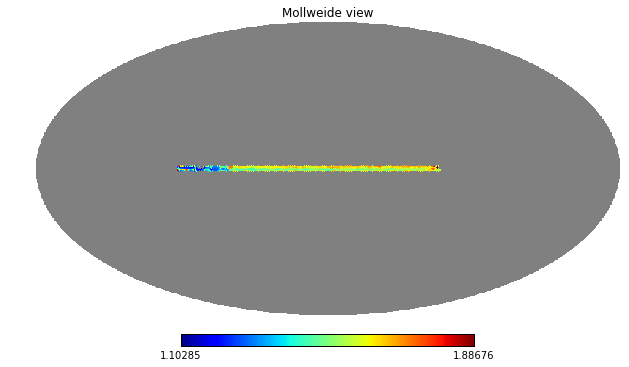

In [5]:
import healpy as hp
hp.mollview(bundle.metricValues)